[Constant]*TMath::Landau(x,[MPV],[Sigma],false)
{'Constant': 0, 'MPV': 1, 'Sigma': 2}
['Constant', 'MPV', 'Sigma']
[453.47908260394036, 0.727125266768409, 0.053404124991841564]
0.727125266768409
[44.88435237321142, 0.007242171266793225, 0.00407947517640574]
24.036266812168215
16


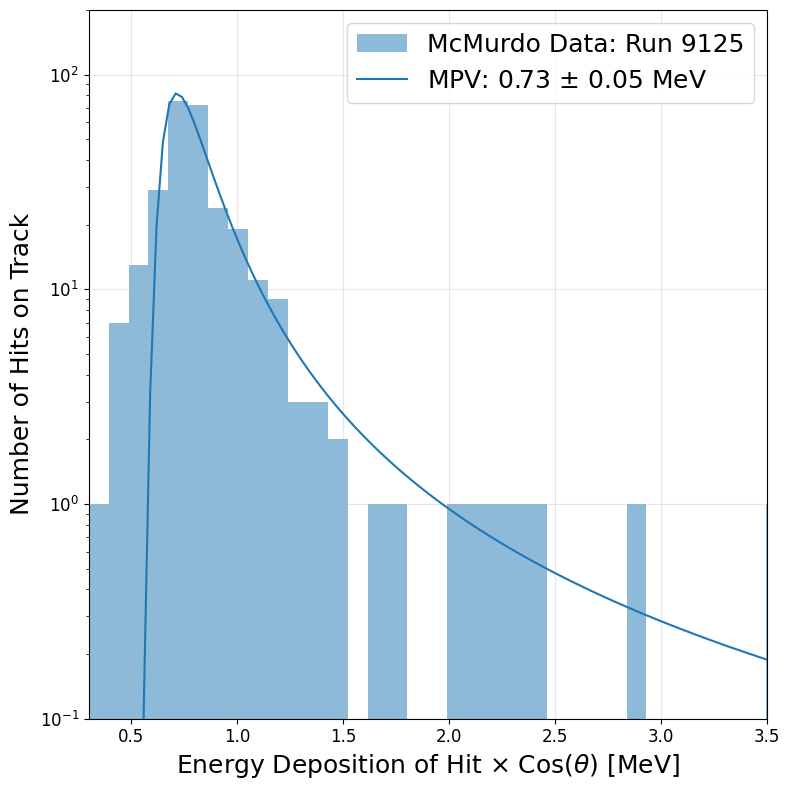

<Figure size 640x480 with 0 Axes>

In [76]:
#This code aims to import, into python, the landau-fitted histogram produced by LRMSFullEdep.C / TheChoseOne.C and similar codes
import uproot
import numpy as np
import matplotlib.pyplot as plt

hhist = uproot.open("p4hstrip.root") #Saved root histogram pre-fitted in the root macro
h = uproot.open("p4hstrip.root:h0_l0r5m3s17") #Pull the fit function separately

hist_mcm = hhist["h0_l0r5m3s17"] #This variable involves the actual histogram, not the fit
edges = hist_mcm.axis().edges()  # Using h1's binning
values1 = hist_mcm.values()

f = h.member("fFunctions")[0] #Pull the fit information from h
print(f.member("fFormula").member("fFormula"))
print(f.member("fFormula").member("fParams"))

print(list(f.member("fFormula").member("fParams")))

print(f.member("fFormula").member("fClingParameters"))
print(list(f.member("fFormula").member("fClingParameters"))[1])

print(f.member("fParErrors"))
print(f.member("fChisquare"))
print(f.member("fNDF"))

#Need to save the x and y values of the fit
l = list(f.member("fSave"))                                 
x_values = np.linspace(l[-2], l[-1], len(l[:-2]))
y_values = l[:-2]

# Create the plot
plt.figure(figsize=(8, 8))
plt.hist(edges[:-1], bins=edges, weights=values1, alpha=0.5, label=hist_0.name,color='tab:blue')
plt.xlabel("Energy Deposition of Hit $\\times$ Cos($\\theta$) [MeV]", fontsize = 18)
plt.ylabel("Number of Hits on Track", fontsize = 18)
plt.tick_params(axis='both', labelsize=12)

plt.title('')
plt.grid(True, alpha=0.3) #Make grid with opacity 0.3
plt.plot(x_values, y_values, color="tab:blue") #Plot the fit

plt.legend(['McMurdo Data: Run 9125', ('MPV: ' + str(round(list(f.member("fFormula").member("fClingParameters"))[1], 2)) + " $\pm$ " + str(round(list(f.member("fFormula").member("fClingParameters"))[2], 2))) + " MeV"], fontsize = 18)

plt.xlim(0.3, 3.5)
plt.ylim(0.1, 200)
plt.yscale('log')
plt.tight_layout()
plt.show()
plt.savefig('MCM_MPV.png')

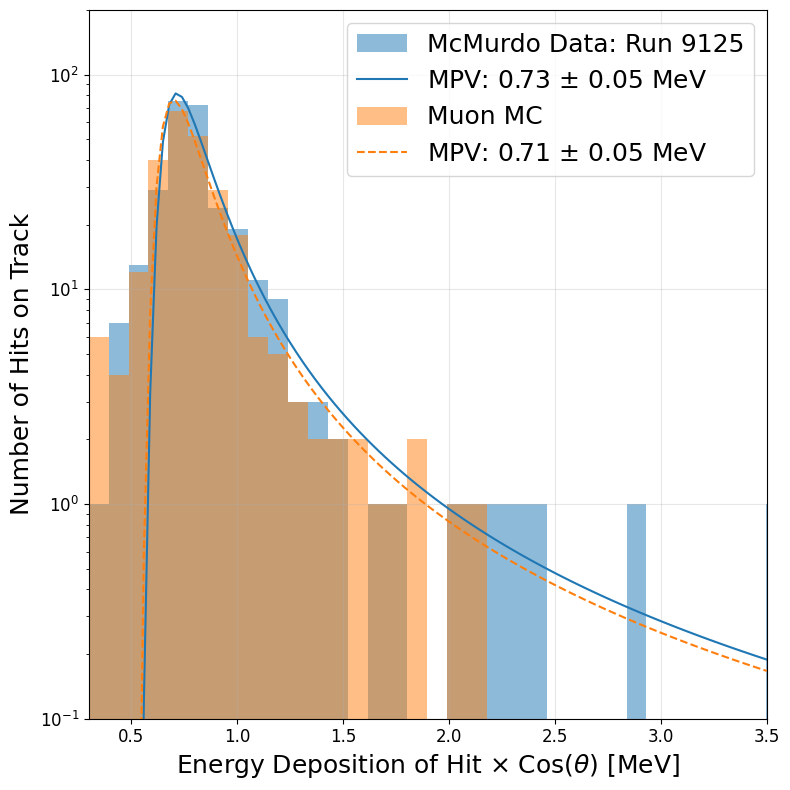

In [118]:
#This code aims to import, into python, the landau-fitted histogram produced by LRMSFullEdep.C / TheChoseOne.C and similar codes
import uproot
import numpy as np
import matplotlib.pyplot as plt

hhist = uproot.open("p4hstrip.root") #Saved root histogram pre-fitted in the root macro
h = uproot.open("p4hstrip.root:h0_l0r5m3s17") #Pull the fit function separately
simhist = uproot.open("h212strip.root")
sim = uproot.open("h212strip.root:h0_l0r5m3s17") #Pull the fit function separately

hist_mcm = hhist["h0_l0r5m3s17"] #This variable involves the actual histogram, not the fit
edges = hist_mcm.axis().edges()  # Using h1's binning
values1 = hist_mcm.values()

hist_sim = simhist["h0_l0r5m3s17"] #This variable involves the actual histogram, not the fit
simedges = hist_sim.axis().edges()  # Using h1's binning
values2 = hist_sim.values()

f = h.member("fFunctions")[0]
fsim = sim.member("fFunctions")[0]

#Need to save the x and y values of the fit
l = list(f.member("fSave"))                                 
x_values = np.linspace(l[-2], l[-1], len(l[:-2]))
y_values = l[:-2]

#Need to save the x and y values of the fit
lsim = list(fsim.member("fSave"))
xsim_values = np.linspace(lsim[-2], lsim[-1], len(lsim[:-2]))
ysim_values = lsim[:-2]

# Create the plot
plt.figure(figsize=(8, 8))

plt.hist(edges[:-1], bins=edges, weights=values1, alpha=0.5, label=hist_mcm.name,color='tab:blue')
plt.plot(x_values, y_values, color="tab:blue") #Plot the fit
plt.hist(simedges[:-1], bins=simedges, weights=values2, alpha=0.5, label=hist_sim.name,color='tab:orange')
plt.plot(xsim_values, ysim_values, color="tab:orange",linestyle='--') #Plot the fit

plt.xlabel("Energy Deposition of Hit $\\times$ Cos($\\theta$) [MeV]", fontsize = 18)
plt.ylabel("Number of Hits on Track", fontsize = 18)
plt.tick_params(axis='both', labelsize=12)
plt.title('')
plt.grid(True, alpha=0.3) #Make grid with opacity 0.3

mcmmpvvals = str(round(list(f.member("fFormula").member("fClingParameters"))[1], 2)) + " $\pm$ " + str(round(list(f.member("fFormula").member("fClingParameters"))[2], 2)) + " MeV"
simmpvvals = str(round(list(fsim.member("fFormula").member("fClingParameters"))[1], 2)) + " $\pm$ " + str(round(list(fsim.member("fFormula").member("fClingParameters"))[2], 2)) + " MeV"

plt.legend(['McMurdo Data: Run 9125', 'MPV: ' + mcmmpvvals, 'Muon MC', 'MPV: ' + simmpvvals], fontsize = 18)

plt.xlim(0.3, 3.5)
plt.ylim(0.1, 200)
plt.yscale('log')
plt.tight_layout()
plt.savefig('MCM_and_Sim_MPV.png')
plt.show()


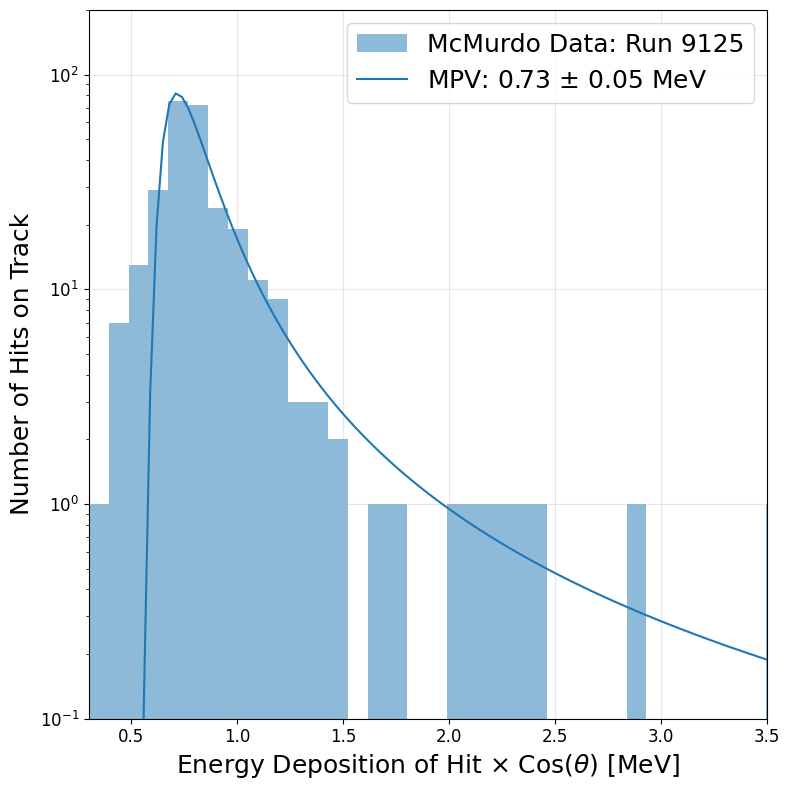

In [119]:
#This code aims to import, into python, the landau-fitted histogram produced by LRMSFullEdep.C / TheChoseOne.C and similar codes
import uproot
import numpy as np
import matplotlib.pyplot as plt

hhist = uproot.open("p4hstrip.root") #Saved root histogram pre-fitted in the root macro
h = uproot.open("p4hstrip.root:h0_l0r5m3s17") #Pull the fit function separately

hist_mcm = hhist["h0_l0r5m3s17"] #This variable involves the actual histogram, not the fit
edges = hist_mcm.axis().edges()  # Using h1's binning
values1 = hist_mcm.values()

f = h.member("fFunctions")[0]

#Need to save the x and y values of the fit
l = list(f.member("fSave"))                                 
x_values = np.linspace(l[-2], l[-1], len(l[:-2]))
y_values = l[:-2]

# Create the plot
plt.figure(figsize=(8, 8))

plt.hist(edges[:-1], bins=edges, weights=values1, alpha=0.5, label=hist_mcm.name,color='tab:blue')
plt.plot(x_values, y_values, color="tab:blue") #Plot the fit

plt.xlabel("Energy Deposition of Hit $\\times$ Cos($\\theta$) [MeV]", fontsize = 18)
plt.ylabel("Number of Hits on Track", fontsize = 18)
plt.tick_params(axis='both', labelsize=12)
plt.title('')
plt.grid(True, alpha=0.3) #Make grid with opacity 0.3

mcmmpvvals = str(round(list(f.member("fFormula").member("fClingParameters"))[1], 2)) + " $\pm$ " + str(round(list(f.member("fFormula").member("fClingParameters"))[2], 2)) + " MeV"

plt.legend(['McMurdo Data: Run 9125', 'MPV: ' + mcmmpvvals], fontsize = 18)

plt.xlim(0.3, 3.5)
plt.ylim(0.1, 200)
plt.yscale('log')
plt.tight_layout()
plt.savefig('MCM_MPV.png')
plt.show()